## Assignment 2 version 2

Note: Student name removed.  Submitted, Fall 2019.

In [0]:
import warnings
warnings.filterwarnings('ignore')

## Visualization Technique (20%)

### A narrative description of the visualization you are planning to use, describing how it works(10%)

The visualization I am planning to use is scatter plot via seaborn. A scatter plot is a type of plot that shows the data as a collection of points. The position of a point depends on its two-dimentional value, where each value is a position on either the horizontal or vertical dimension.

Scatter plots can be used to compare distribution of two variables and see whether there is any correlation between them. If there are distinct clusters/segments within the data, it will be clear in the scatter plot.


### A discussion of in which circumstances this visualization should and should not be used (what is it close to? What else could you consider? How does it relate to specific aspects of data? (10%)

Scatter plots’ primary uses are to identify and present correlational relationships between two numeric variables. Dots in a scatter plot can demonstrate data points values, as well as reveal patterns within the whole dataset.

A scatter plot can be used either when one continuous variable is dependent on the other, or when both continuous variables are independent.

Sometimes the data points in a scatter plot form distinct groups. These groups are called clusters. Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (cluster) are more similar to each other than to those in other group.

Some issues when using scatter plots:
1. Overplotting. When there are too many data points to plot, overplotting may happen where data points overlap to a degree too difficult to observe relationships between points and variables, because the data points are too densely packed. Work arounds include: 1) sampling a subset of data points: a random selection of points should still give the general idea of the patterns in the full data;2) changingthe form of the dots, adding transparency to allow for overlaps to be visible, or reducing point size so that fewer overlaps occur; 3) switching to a different chart type using various coloring to indicate the number of points in each group.
2. Interpreting correlation as causation. Correlation does not imply causation. It is possible that the observed relationship is driven by some third variable that affects both of the plotted variables, that the causal link is reversed, or that the pattern is simply coincidental.

## Visualization Library (20%)

### The library you are going to use, and a background on why the library is good for this visualization. Who created it? Is it open source? How do you install it? (10%)

The library I am going to use is Seaborn. Seaborn works with the dataset as a whole and is much more intuitive than Matplotlib.

“If Matplotlib “tries to make easy things easy and hard things possible, seaborn tries to make a well-defined set of hard things easy too” – Michael Waskom (Creator of Seaborn).

Michael Waskom is a postdoctoral researcher in the Center for Neural Science at New York University and a Junior Fellow of the Simons Society of Fellows. He is the creator of Seaborn, an open-source Python data visualization library.

Seaborn was developed based on the Matplotlib library. It is used to create more attractive and informative statistical graphics. While seaborn is a different package, it can also be used to develop the attractiveness of matplotlib graphics.

Seaborn Installation
- Pip installation: `pip install seaborn`
- Conda Installation: `conda install seaborn`
- Alternatively, you can use pip to install the development version directly from github: `pip install git+https://github.com/mwaskom/seaborn.git`
- Another option: clone the github repository and install from your local copy: `pip install .`

### A discussion of the general approach and limitations of this library. Is it declarative or procedural? Does it integrate with Jupyter? Why you decided to use this library (especially if there are other options)? (10%)

Seaborn library, similar to matplotlib pyplot, its scripting layer is a procedural method for building a visualization. In that we tell the underlying software which drawing actions we wanted to take in order to render our data.

Seaborn overcomes some of the Matplotlib shortcomings:
 - Matplotlib's customization level is limited. It is hard to find out in Matplotlib which settings are required to make plots more appealing. Seaborn has more customization themes options and high-level interfaces to solve this issue.
 - Matplotlib doesn’t work as well with DataFrames via Pandas as Seaborn does.

Specifically, the reasons I chose Seaborn also involve the following strengths of Seaborn:
- Using default themes that are aesthetically pleasing.
- Setting custom color palettes.
- Making attractive statistical plots.
- Easily and flexibly displaying distributions.
- Visualizing information from matrices and DataFrames.

Limitation: Seaborn is dependent of numpy, scipy, pandas and Matplotlib. It is unlikely to utilize Seaborn alone without Matplotlib to complete 3D scatter plotting. Therefore, I can only pick two of the most curious variables as my obsevation parameters for the 2 dimensional plot.

## Demonstration (60%)

### The dataset you picked and instructions for cleaning the dataset. You should pick a suitable dataset to demonstrate the technique, toolkit, and problem you are facing. (10%)

For this specific shopping mall customers dataset, I am curious in observing any potential correlational relationship between customers' income and spending. I am planning on utilizing two of the continuous variables in the dataset, `Annual Income($k)` and and `Spending Score (1-100)` to form the scatter plot axes, and uncover distinct groups of customer mix groups (clusters).

Data source:https://www.kaggle.com/shwetabh123/mall-customers

I have downloaded the dataset to a csv file along with the notebook submission.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# reading and briefly observing data
df = pd.read_csv("Mall_Customers.csv")
df.head()

FileNotFoundError: ignored

In [0]:
#Examining the df['Annual Income (k$)'] series
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

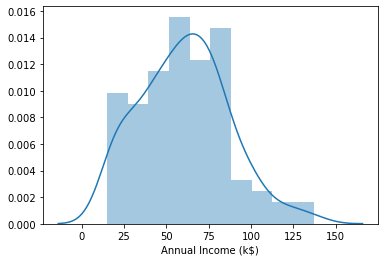

In [0]:
sns.distplot(df['Annual Income (k$)'])

It appears that the majority of customers have income within the range of approximately $20k-$90k.

In [0]:
#Examining the df['Spending Score (1-100)'] series
df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

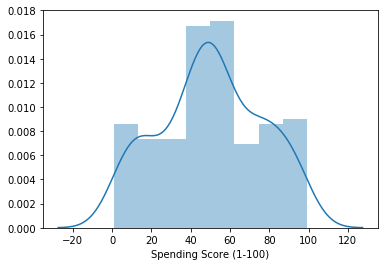

In [0]:
sns.distplot(df['Spending Score (1-100)'])

The most centralized group of customers has spending score within approximately 40-60 range.

### The quality of your demonstration. First demonstrate the basics of this approach, then show a few of the edges of how the library might be used for other cases. This is the "meat" of the assignment. (40%)

One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, to draw a scatter plot with possibility of several semantic groupings takes just one line of code using the `scatterplot()` function.

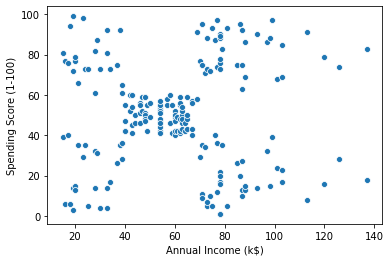

In [0]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

As shown in the scatter plot above, there are 5 relatively distinctively identifiable groups formed within the dataset:
1. lower income (<40k) + lower spend(<40);
2. lower income(<40k) + higher spend(>60);
3. mid income(40k-70k) + mid spend (40-60);
4. higher income(>70k) + lower spend (<40);
5. higher income(>70k) + higher spend(>60)

To make the groups more visually distinctive, I can color code the groups after adding a categorical parameter in the original dataframe.

In [0]:
#income tiers: lower income (li), mid income (mi), higher income (hi)
li = (df['Annual Income (k$)'] < 40)
mi = (df['Annual Income (k$)'] >= 40) & (df['Annual Income (k$)'] < 70)
hi = (df['Annual Income (k$)'] >= 70)

#spending score tiers: lower spend(ls),mid spend (ms),higher spend (hs)
ls = (df['Spending Score (1-100)'] <= 40)
ms = (df['Spending Score (1-100)'] > 40) & (df['Spending Score (1-100)'] <= 60)
hs = (df['Spending Score (1-100)'] > 60)

In [0]:
#creating a new categorical variable 'group', 
df['group']=''

In [0]:
#Assigning group numbers based on observed categories as above.
df['group'][li & ls]=1
df['group'][li & hs]=2
df['group'][mi & ms]=3
df['group'][hi & ls]=4
df['group'][hi & hs]=5

In [0]:
#checking to see if there are any rows left ungrouped
df.loc[df['group'] =='']

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),group
93,94,Female,40,60,40,
121,122,Female,38,67,40,
123,124,Male,39,69,91,


In [0]:
#assigning the 3 to an 'other' group
df['group'].loc[df['group'] =='']='other'
df['group'].unique()

array([1, 2, 3, 'other', 4, 5], dtype=object)

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not [None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None
 (1.0, 0.6235294117647059, 0.6078431372549019) None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None
 (1.0, 0.6235294117647059, 0.6078431372549019) None
 (1.0, 0.6235294117647059, 0.6078431372549019) None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None].

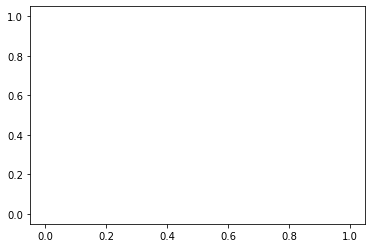

In [0]:
#Now we can plot all group color coded using the hue argument, changing the color palette to a prettier outlook.
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='group',data=df,palette='pastel')

Additional exploration aspects:

`lmplot()` provides a combined approach of plotter scatter dots and regression line in one simple step in the same chart. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

In [0]:
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,palette='pastel')

Additional Discussion around limiations of this method: Although there are many additional variations of markers in seaborn scatter plots, bubble plots and 3D axes are easier to realize in matplotlib.

### Adherence to some of Rule et al's rules for computational analyses. You must explicitly describe the rules (aim for 4) you have adhered to in this assignment and provide 2-3 sentences about how you have adhered to these rules. (10%)

#### Rule 1: Tell a story for an audience
This rule suggests us to use the Jupyter Notebook to interleve with explanatory text with code and result to create a computational narrative, that not only contains bare bone codes, but also tell a story of the mission and thought process of myself as the storyteller.
As outlined in the article, how I tell the story in my notebook should depend on my goal and audience. This notebook will likely only be shared and viewed among this course's teaching team. Therefore my explanation in addition to my code needs to be on point and succinct, focusing more on the outlines required in the assignment instructions, rather than expanding too much into real world cluster analysis application among customer segmentation and other aspects.

#### Rule 2: Document the process, not just the results
This rule refers to cleaning, organizing, and annoting my notebook consistently. To best utilize the interactivitiy of Jupyter notebook, I have noted through out the notebook consistently the techniques I utlized and the thought process of my data visualization and analysis. The grading team will be able to understand my thought process and the iterations I took to demonstrate the edges of the library as far as I explored the features.

#### Rule 3 Use cell divisions to make steps clear
This rule reminds us to avoid cells too long, and suggests that we put low-level documentation in code comments, and put descriptive markdown headers to organize the notebook into sections easier for people to navigate through, and to add table of contents or separate into a series of indexed notebooks if needed. As shown above, I have sectioned each main section as required in the assignement accordingly, while also commented or used separate mark down cells as descriptions through out my assignment.

#### Rule 4 Modularize code
This rule encourages us avoid duplicate code by modularizing the sections. This avoids getting the cells too messy to read, or too difficult to debug.
I have modularized the income and spending tiering so that when I was later creating cluster groups, those modules were referred and therefore shortened the codes.

Additional thoughts on spending scores: I was not able to find clear exploration regarding the Spending Score (1-100) grading system or rationale. It could be graded based on the customers' self-reporting spending willingness, transactional data comparison among existing mall customers, or spending behavior comparing to even larger sample size independent of shopping behavior at the mall.

Additional thoughts on clustering approach: there are more advanced approach to help guide researchers identify the optimal number of clusters within a dataset, such as k-means clustering. Looking forward to exploring them in future tasks and assignments.